In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import dataset
df = pd.read_csv('taxi_trip_pricing.csv')

In [3]:
# Inspect dataset
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


In [4]:
# Fill null values.

# Numeric columns: fill with median value
numeric_columns = df.select_dtypes(include=np.number)
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Categorical columns: fill with mode value
categorical_columns = df.select_dtypes(exclude=np.number)
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Print sum of null values to check that there are none anymore.
print(df.isnull().sum())

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


### Correlation Between Numeric Variables

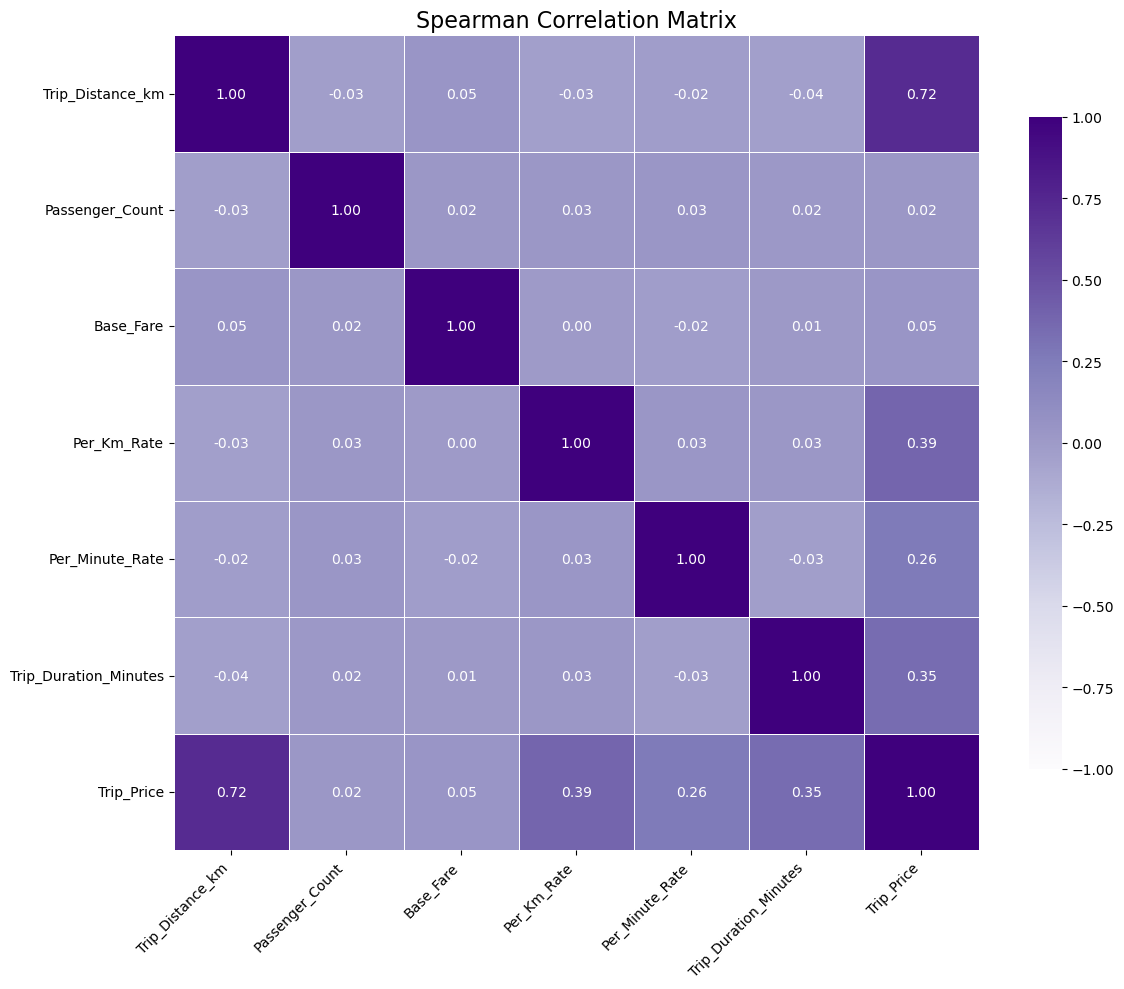

In [5]:
# Create a correlation matrix for the numeric variables
corr_matrix = numeric_columns.corr(method='spearman')

# Create a heatmap 
plt.figure(figsize=(12, 10))  # Increased figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', vmin=-1, vmax=1,
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 10}, linewidths=0.5)


plt.title('Spearman Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 

plt.tight_layout()
plt.show()

## Price and Correlated Factors

### Trip Price Distribution

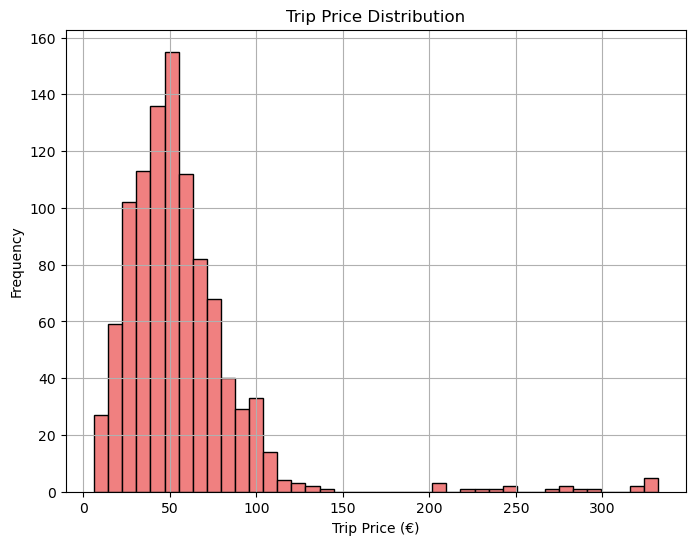

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(data=df, x='Trip_Price', bins=40, color='lightcoral', edgecolor='black')

plt.title('Trip Price Distribution')
plt.xlabel('Trip Price (€)')
plt.ylabel('Frequency')
plt.grid(visible=True)

plt.show()

### Trip Distance vs Trip Price

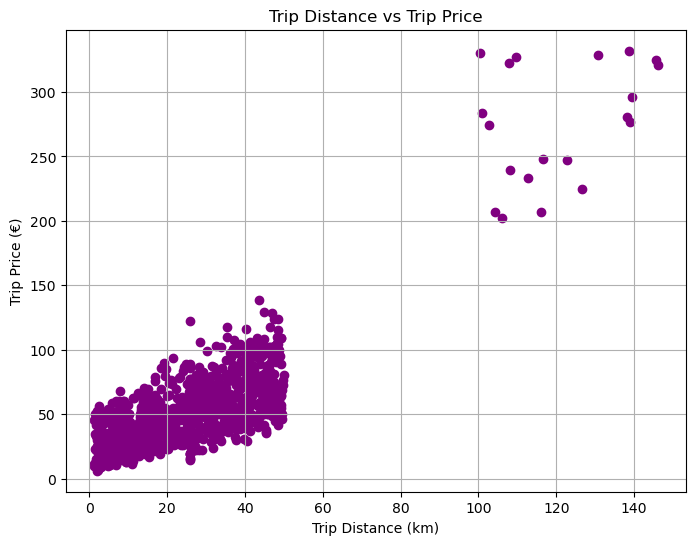

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data=df, x='Trip_Distance_km', y='Trip_Price', color='purple')

plt.title('Trip Distance vs Trip Price')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price (€)')
plt.grid(visible=True)

plt.show()

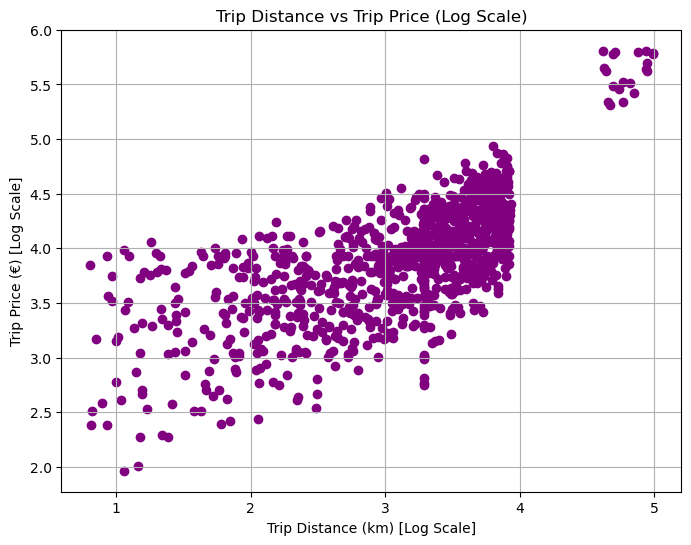

In [8]:
# Since our previous plot was too dense, we are going to use a log scale to get a better plot.
plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(df['Trip_Distance_km']), np.log1p(df['Trip_Price']), color='purple')

plt.title('Trip Distance vs Trip Price (Log Scale)')
plt.xlabel('Trip Distance (km) [Log Scale]')
plt.ylabel('Trip Price (€) [Log Scale]')
plt.grid(visible=True)

plt.show()

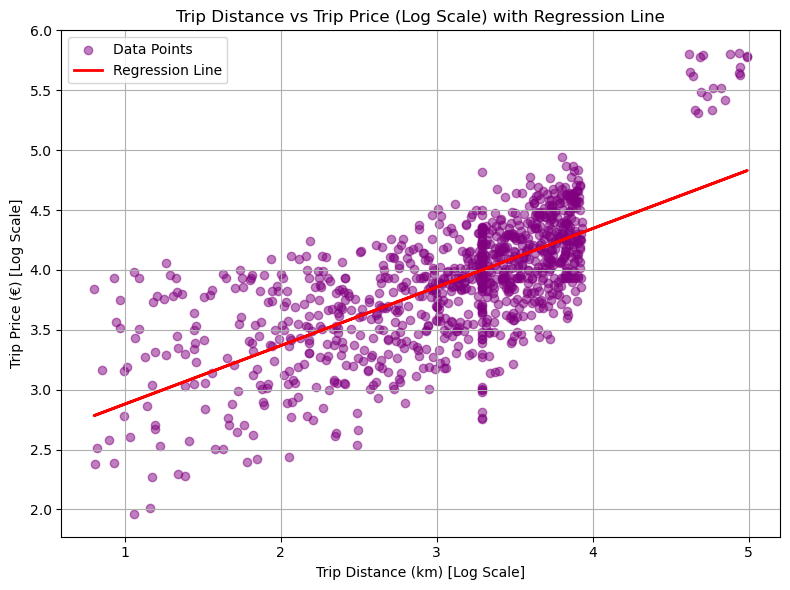

In [9]:
# Apply log transformation to the data
log_trip_distance = np.log1p(df['Trip_Distance_km'])
log_trip_price = np.log1p(df['Trip_Price'])

# Fit a linear regression model
model = LinearRegression()
model.fit(log_trip_distance.values.reshape(-1, 1), log_trip_price)

# Predict the y-values (log of the trip prices) using the linear model
predicted_log_trip_price = model.predict(log_trip_distance.values.reshape(-1, 1))

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(log_trip_distance, log_trip_price, color='purple', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(log_trip_distance, predicted_log_trip_price, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.title('Trip Distance vs Trip Price (Log Scale) with Regression Line')
plt.xlabel('Trip Distance (km) [Log Scale]')
plt.ylabel('Trip Price (€) [Log Scale]')
plt.legend()
plt.grid(visible=True)

# Show plot
plt.tight_layout()
plt.show()

### Trip Price vs Traffic Conditions

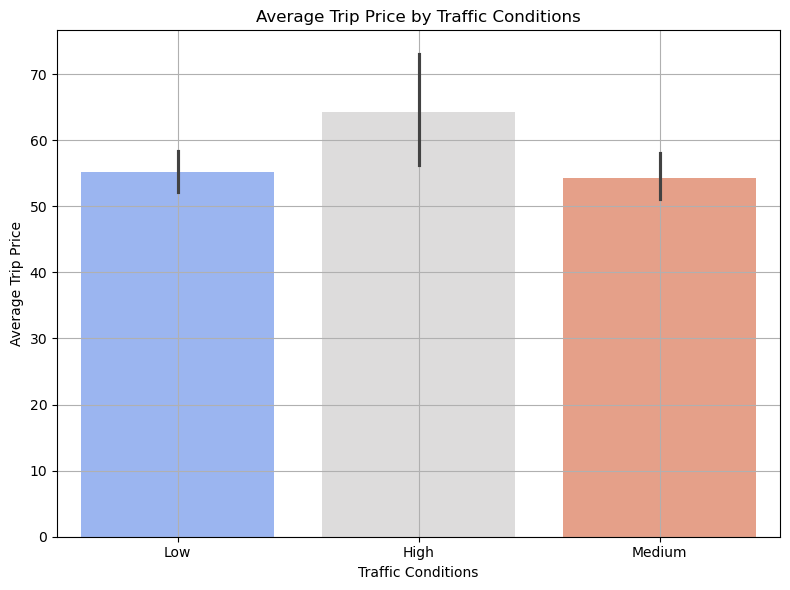

In [10]:
# Plot for Traffic Conditions
plt.figure(figsize=(8, 6))
sns.barplot(x="Traffic_Conditions", y="Trip_Price", hue='Traffic_Conditions', data=df, palette="coolwarm")

plt.title("Average Trip Price by Traffic Conditions")
plt.xlabel("Traffic Conditions")
plt.ylabel("Average Trip Price")
plt.grid(True)

plt.tight_layout()
plt.show()

### Trip Price vs Weather

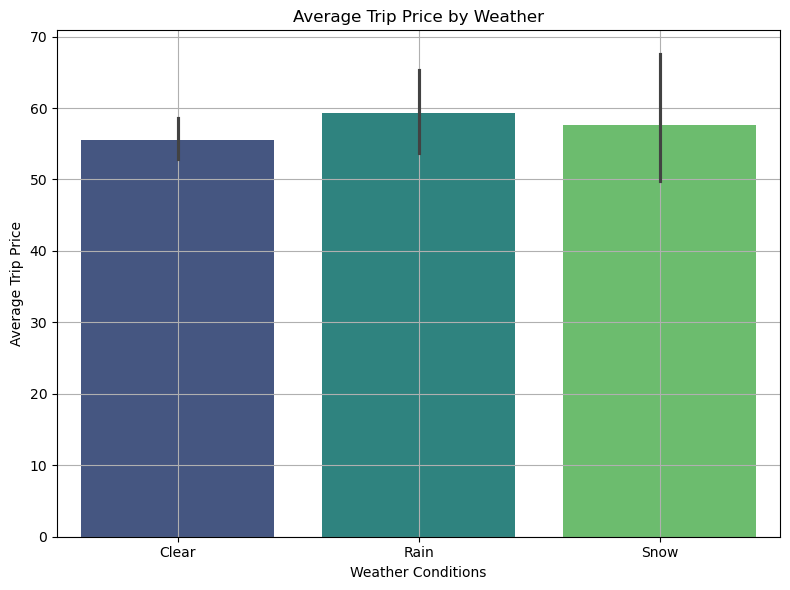

In [11]:
# Plot for Weather
plt.figure(figsize=(8, 6))
sns.barplot(x="Weather", y="Trip_Price", data=df, hue='Weather', palette="viridis")

plt.title("Average Trip Price by Weather")
plt.xlabel("Weather Conditions")
plt.ylabel("Average Trip Price")
plt.grid(True)

plt.tight_layout()
plt.show()

### Combined Impact of Traffic and Weather on Trip Price

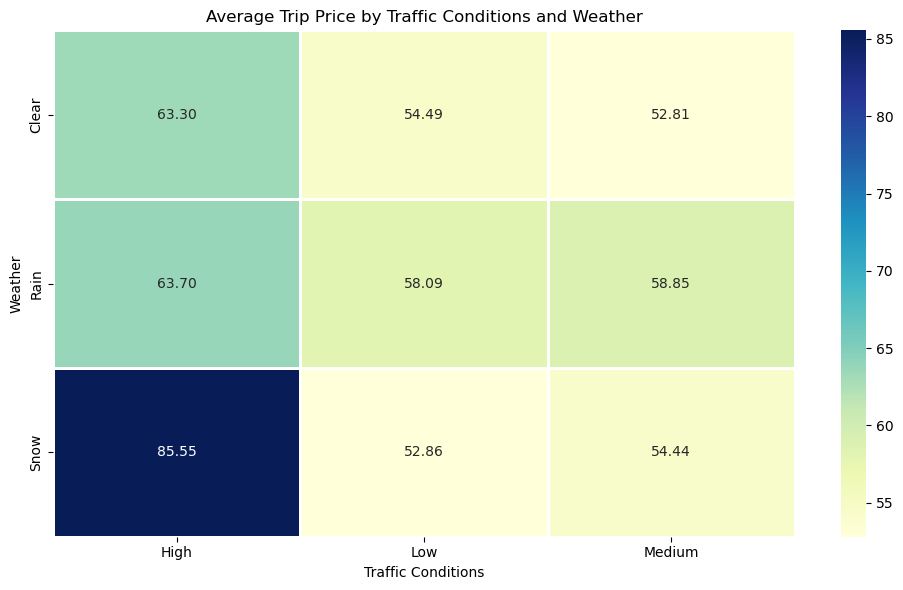

In [12]:
traffic_weather_combined = (df.groupby(["Traffic_Conditions", "Weather"])["Trip_Price"].mean().reset_index().sort_values(by="Trip_Price", ascending=False))
traffic_weather_combined_pivot = traffic_weather_combined.pivot(index="Weather", columns="Traffic_Conditions", values="Trip_Price")

# Using a heatmap to visualize the combined impact
plt.figure(figsize=(10, 6))
sns.heatmap(traffic_weather_combined_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.9)

plt.title("Average Trip Price by Traffic Conditions and Weather")
plt.xlabel("Traffic Conditions")
plt.ylabel("Weather")

plt.tight_layout()
plt.show()

## Analyzing the relationship between Price and Time_of_Day, Day_of_Week.

### Relationship between Time_of_Day and Trip_Price.

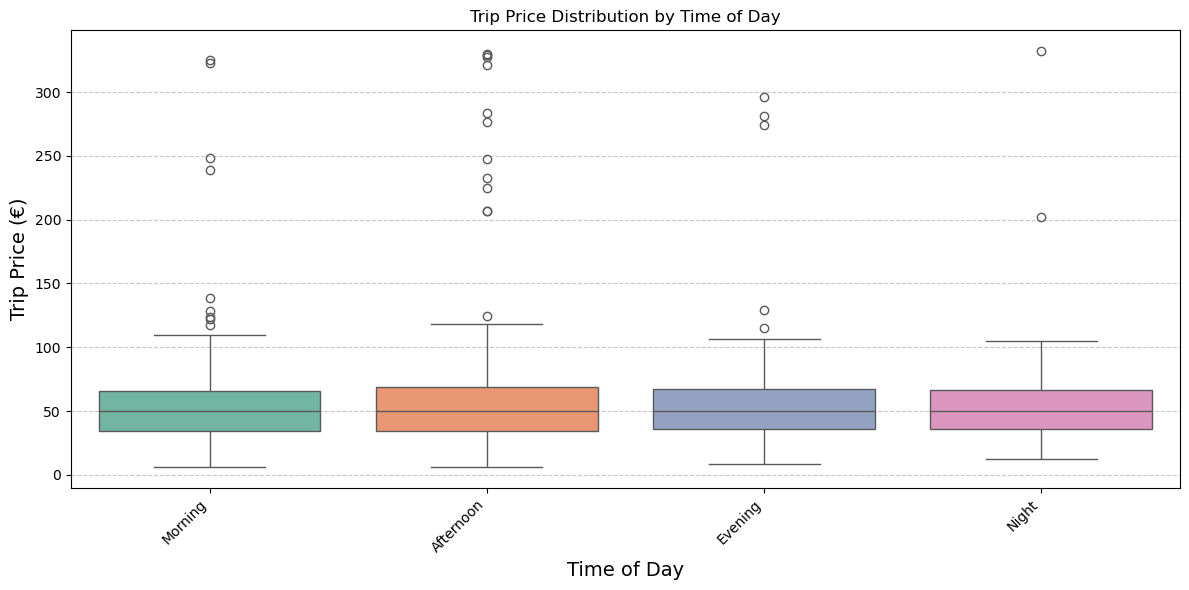

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Time_of_Day', y='Trip_Price', hue='Time_of_Day', data=df, palette="Set2", legend=False)

plt.title('Trip Price Distribution by Time of Day')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Trip Price (€)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Relationship between Day_of_Week and Trip_Price.

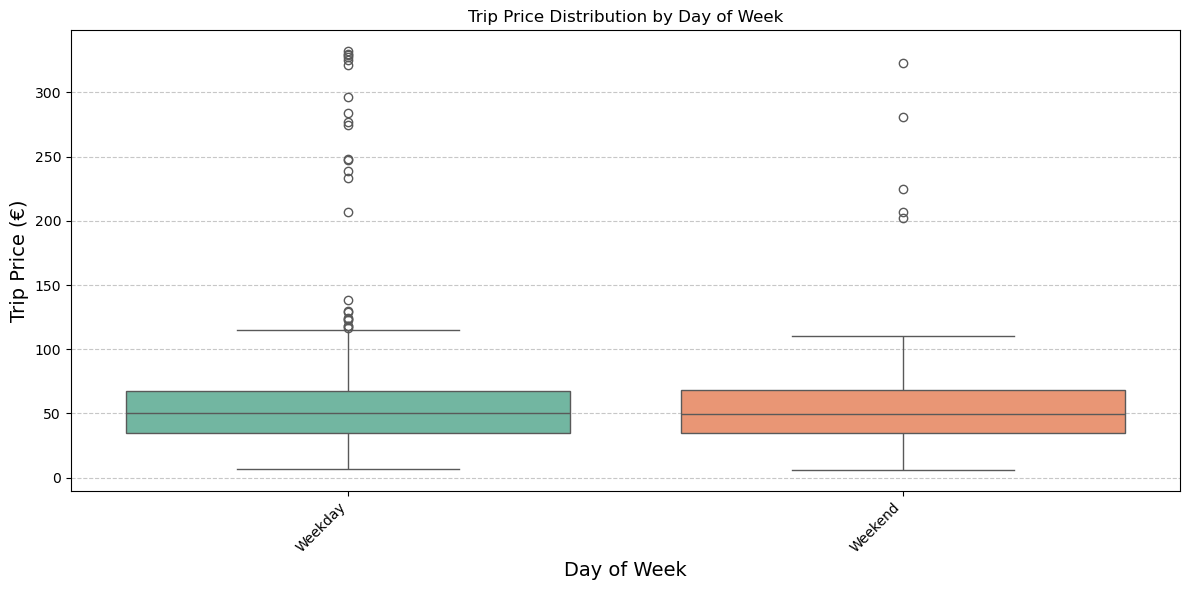

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Day_of_Week', y='Trip_Price', hue='Day_of_Week', data=df, palette="Set2", legend=False)

plt.title('Trip Price Distribution by Day of Week')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Trip Price (€)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Analyzing the relationship between Distance and Time_of_Day, Day_of_Week.

### Relationship between Time_of_Day and Trip_Distance.

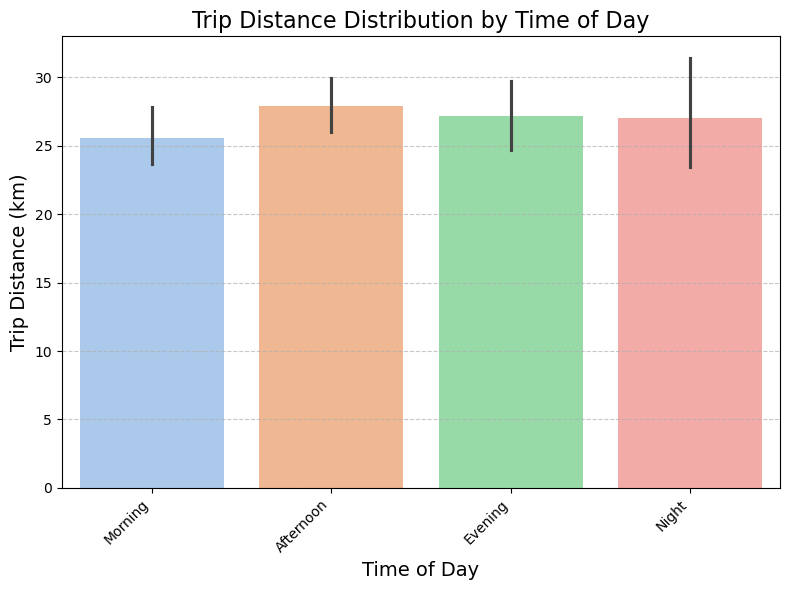

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Time_of_Day', y='Trip_Distance_km', hue='Time_of_Day', palette='pastel', legend=False)

plt.title('Trip Distance Distribution by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Trip Distance (km)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Relationship between Day_of_Week and Trip_Distance.

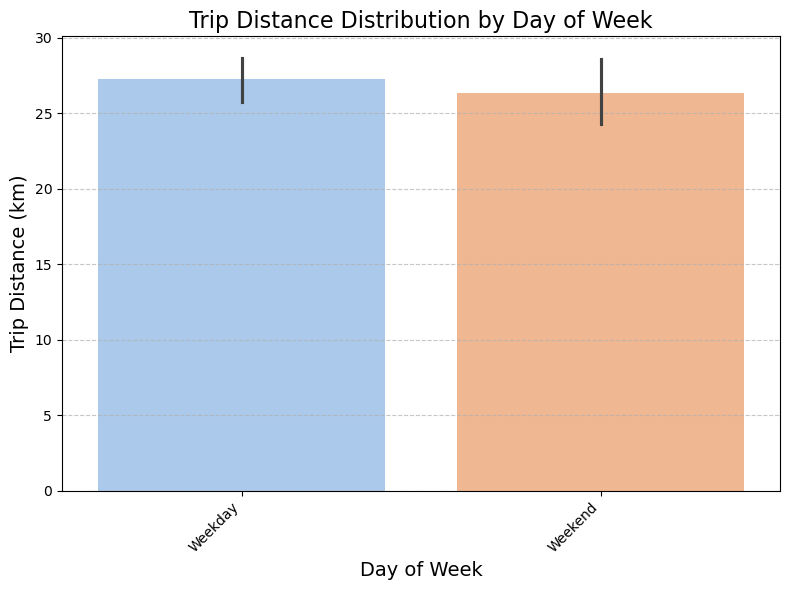

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Day_of_Week', y='Trip_Distance_km', hue='Day_of_Week', palette='pastel', legend=False)

plt.title('Trip Distance Distribution by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Trip Distance (km)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Analyzing the Relationship between Time_of_Day and Traffic_Conditions

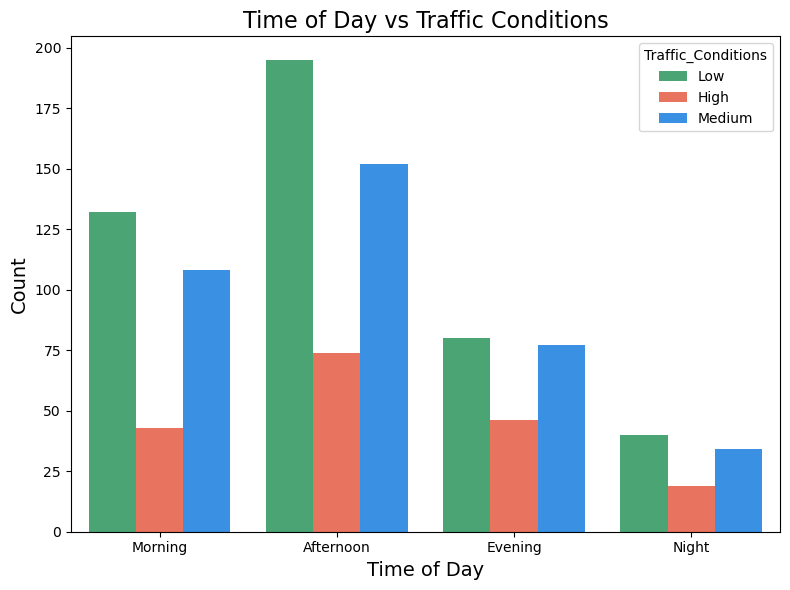

In [17]:
traffic_condition_colors = {'High': '#FF6347', 'Medium': '#1E90FF', 'Low': '#3CB371'}

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Time_of_Day', hue='Traffic_Conditions', palette=traffic_condition_colors)

plt.title('Time of Day vs Traffic Conditions', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

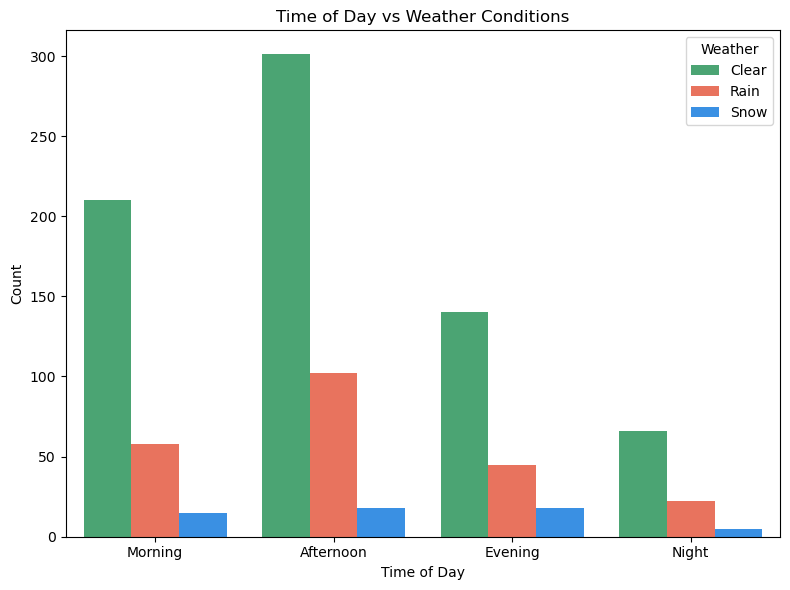

In [18]:
traffic_condition_colors = {'Rain': '#FF6347', 'Snow': '#1E90FF', 'Clear': '#3CB371'}

plt.figure(figsize=(8, 6))
sns.countplot(x='Time_of_Day', hue='Weather', data=df, palette=traffic_condition_colors)

plt.title('Time of Day vs Weather Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Analyzing the Relationship between Time_of_Day, Time_of_Week and Passenger_Count.

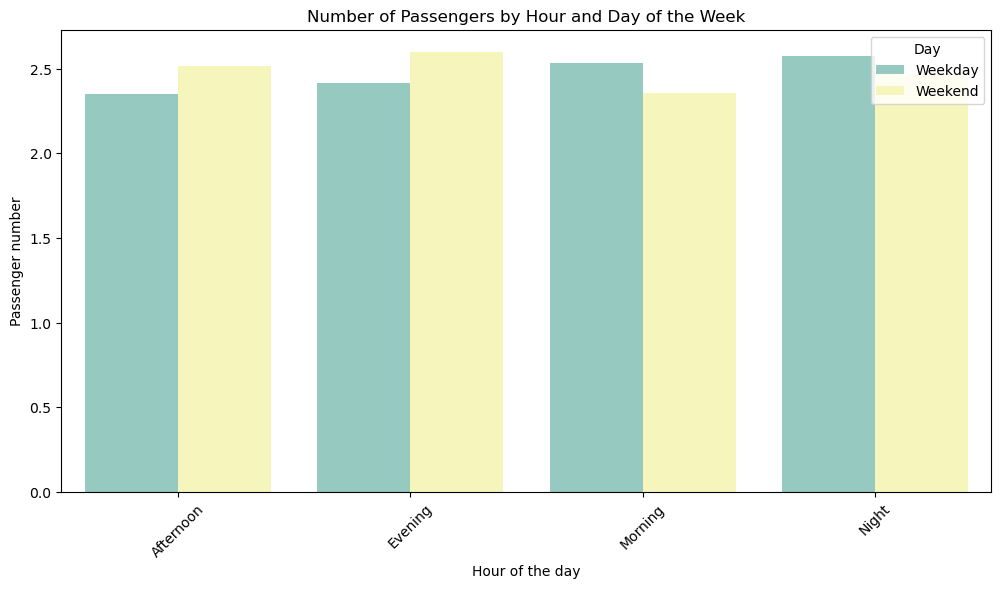

In [19]:
df['Passenger_Count'] = pd.to_numeric(df['Passenger_Count'], errors='coerce')
grouped = df.groupby(['Day_of_Week', 'Time_of_Day'])['Passenger_Count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Time_of_Day', y='Passenger_Count', hue='Day_of_Week', palette='Set3', data=grouped, errorbar=None)

plt.title("Number of Passengers by Hour and Day of the Week")
plt.xlabel("Ηour of the day")
plt.ylabel("Passenger number")
plt.xticks(rotation=45)  
plt.legend(title="Day")

plt.show()

## Price Components Analysis

In [20]:
df['Distance_Revenue'] = df['Trip_Distance_km'] * df['Per_Km_Rate']
df['Time_Revenue'] = df['Trip_Duration_Minutes'] * df['Per_Minute_Rate']

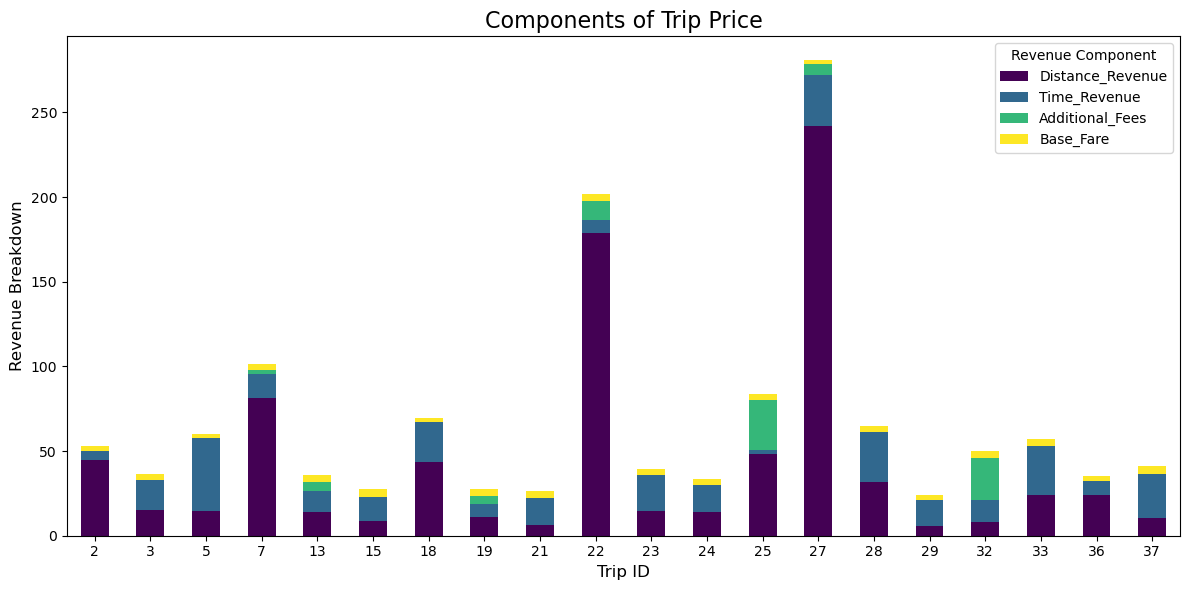

In [21]:
df["Additional_Fees"] = df['Trip_Price']-df['Distance_Revenue']-df['Time_Revenue']-df['Base_Fare']
df = df[ df["Additional_Fees"]>=0 ]

# Select a subset of trips for visualization
sample_df = df.head(20)

# Extract data for plotting
trip_ids = sample_df.index
components = ['Distance_Revenue', 'Time_Revenue', 'Additional_Fees', 'Base_Fare']
data = sample_df[components]

# Plot stacked bar chart
data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add titles and labels
plt.title('Components of Trip Price', fontsize=16)
plt.xlabel('Trip ID', fontsize=12)
plt.ylabel('Revenue Breakdown', fontsize=12)
plt.xticks(ticks=range(len(trip_ids)), labels=trip_ids, rotation=0)
plt.legend(title='Revenue Component')

plt.tight_layout()
plt.show()

### Which rate is more lucrative? Per min or per km?

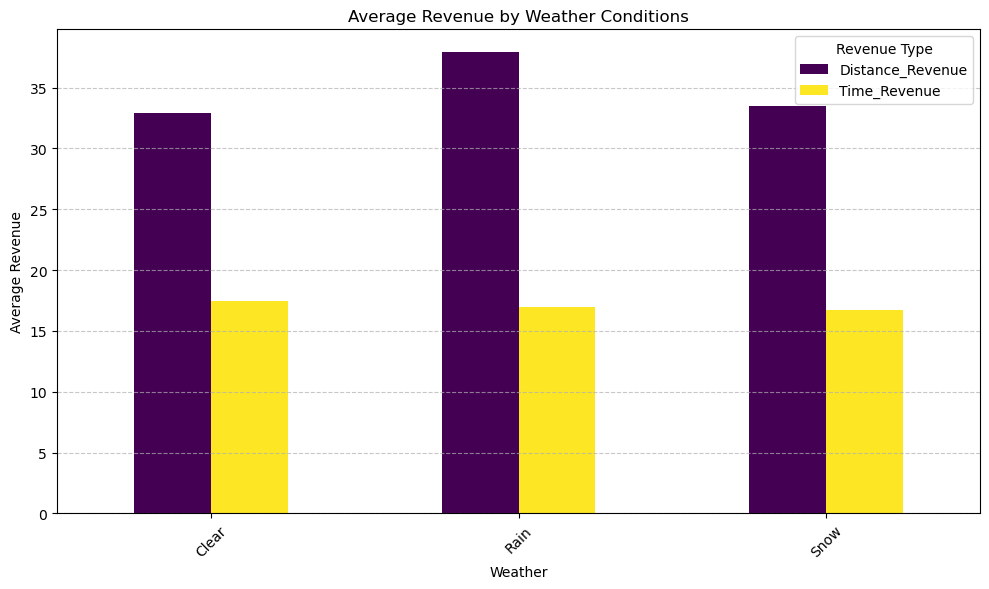

In [22]:
grouped = df.groupby('Weather')[['Distance_Revenue', 'Time_Revenue']].mean()

# Plot the data
grouped.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Average Revenue by Weather Conditions')
plt.ylabel('Average Revenue')
plt.xlabel('Weather')
plt.legend(title='Revenue Type')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('1.jpg')

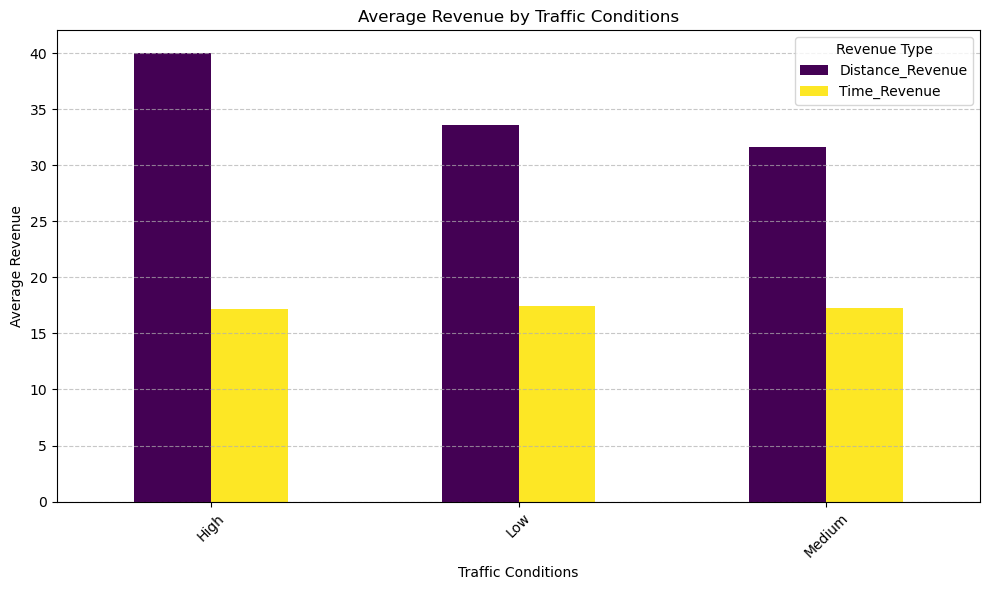

In [23]:
grouped = df.groupby('Traffic_Conditions')[['Distance_Revenue', 'Time_Revenue']].mean()

# Plot the data
grouped.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Average Revenue by Traffic Conditions')
plt.ylabel('Average Revenue')
plt.xlabel('Traffic Conditions')
plt.legend(title='Revenue Type')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('2.jpg')

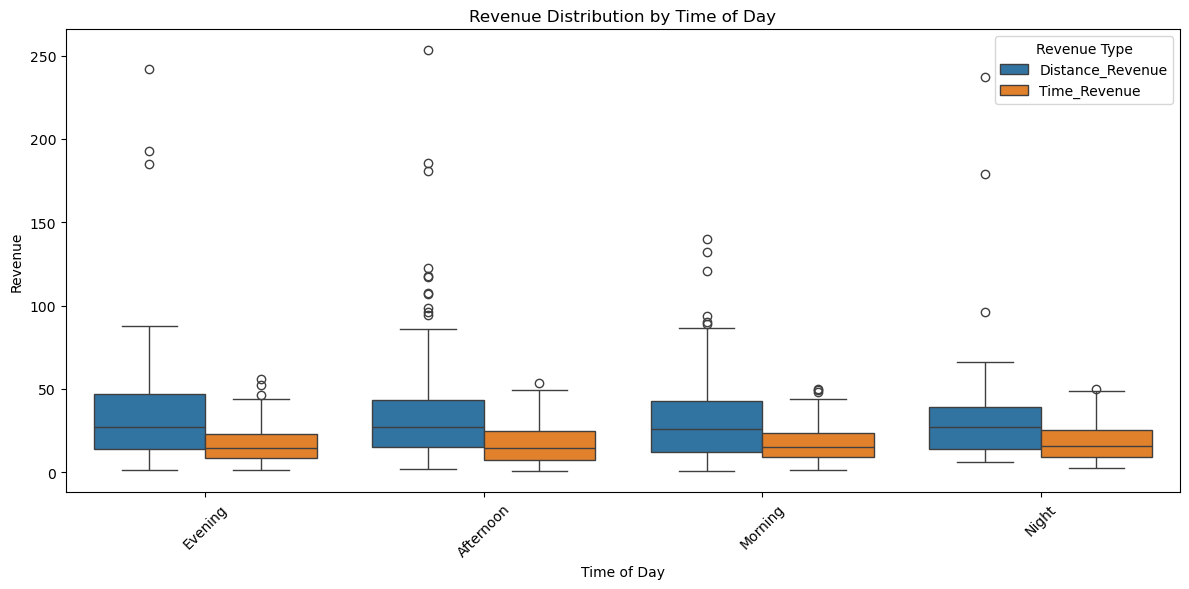

In [24]:
# Melt the DataFrame for box plot
melted_time = df.melt(id_vars='Time_of_Day', 
                      value_vars=['Distance_Revenue', 'Time_Revenue'],
                      var_name='Revenue Type', value_name='Revenue')

# Plot the data
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_time, x='Time_of_Day', y='Revenue', hue='Revenue Type')

plt.title('Revenue Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Revenue Type')

plt.tight_layout()
plt.show()

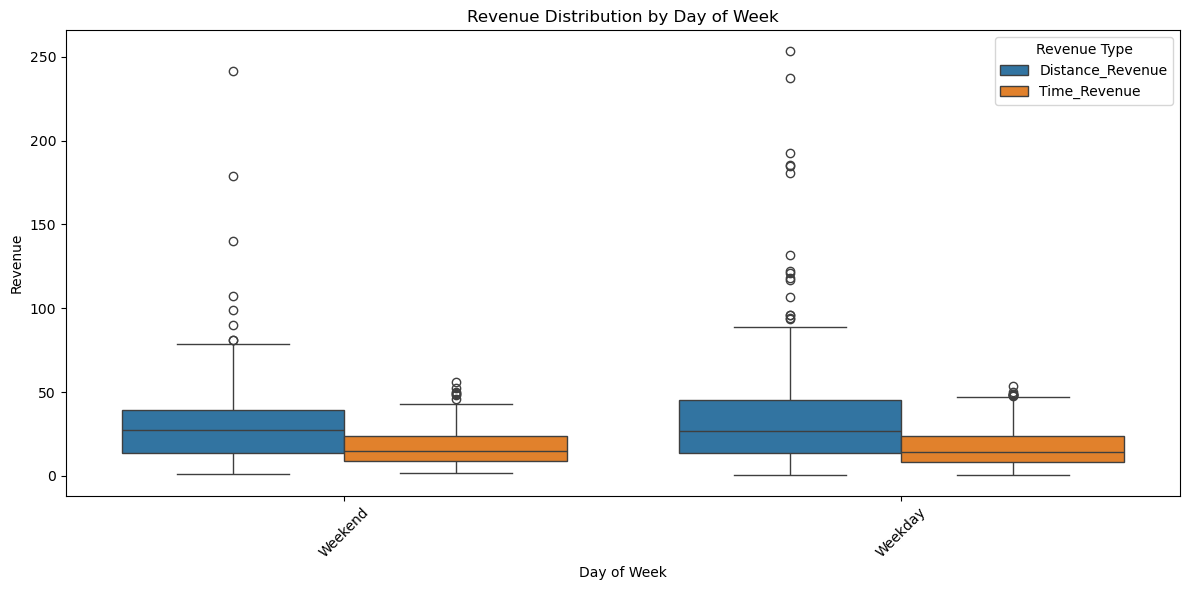

In [25]:
melted_day = df.melt(id_vars='Day_of_Week', 
                     value_vars=['Distance_Revenue', 'Time_Revenue'],
                     var_name='Revenue Type', value_name='Revenue')


plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_day, x='Day_of_Week', y='Revenue', hue='Revenue Type')

plt.title('Revenue Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Revenue Type')

plt.tight_layout()
plt.show()